In [1]:
#%load_ext lab_black
%matplotlib inline
#%load_ext autoreload
#%autoreload 2

import logging
import numpy as np
import pandas as pd
from traffic.core import Traffic
from traffic.data import nm_airspaces

logger = logging.getLogger()
logger.setLevel(logging.INFO)

# LFBBBDX (Bordeaux ACC)

INFO:root:Clustering...
INFO:root:Cluster 0: 4 trajectories = 1.5% of the traffic
INFO:root:Cluster 1: 12 trajectories = 4.4% of the traffic
INFO:root:Cluster 2: 5 trajectories = 1.9% of the traffic
INFO:root:Cluster 3: 19 trajectories = 7.0% of the traffic
INFO:root:Cluster 4: 5 trajectories = 1.9% of the traffic
INFO:root:Cluster 5: 16 trajectories = 5.9% of the traffic
INFO:root:Cluster 6: 15 trajectories = 5.6% of the traffic
INFO:root:Cluster 7: 4 trajectories = 1.5% of the traffic
INFO:root:Cluster 8: 5 trajectories = 1.9% of the traffic
INFO:root:Cluster 9: 3 trajectories = 1.1% of the traffic
INFO:root:Cluster 10: 3 trajectories = 1.1% of the traffic
INFO:root:Cluster 11: 3 trajectories = 1.1% of the traffic
INFO:root:Cluster 12: 3 trajectories = 1.1% of the traffic
INFO:root:Cluster 13: 6 trajectories = 2.2% of the traffic
INFO:root:Cluster 14: 3 trajectories = 1.1% of the traffic
INFO:root:Cluster 15: 4 trajectories = 1.5% of the traffic
INFO:root:Cluster 16: 3 trajectories =

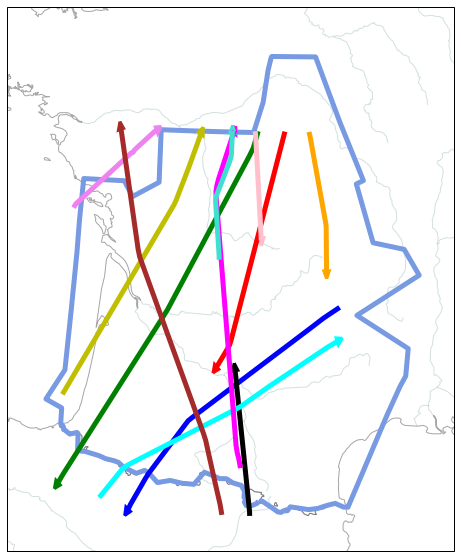

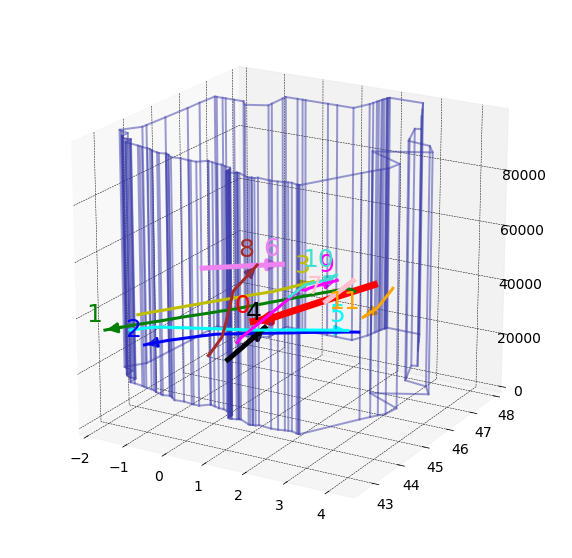

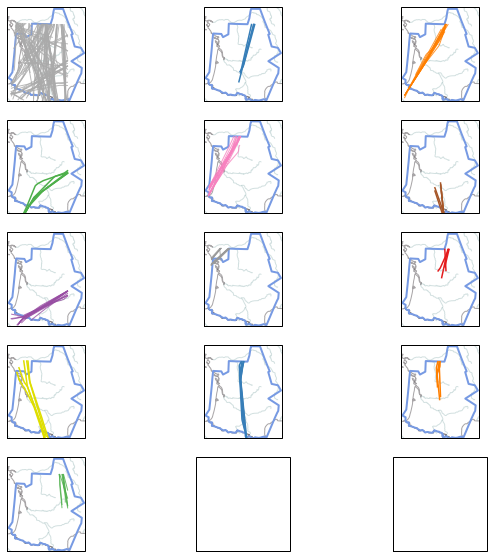

In [2]:
from traffic.core.projection import Lambert93
from sectflow.clustering import TrajClust


def good_flight(flight):
    return flight.duration > pd.Timedelta("5 minutes")


t = Traffic.from_file("~/traffic/traffic/data/sample_opensky.pkl")
t_filtered = (
    t.assign(
        log_altitude=lambda df: df.altitude.apply(lambda x: np.log10(x) if x > 0 else x)
    )
    .clean_invalid()
    .assign_id()
    .filter_if(good_flight)
    .filter()
    .filter(altitude=53)
    .resample("5s")
    .resample(50)
    .eval(desc="preprocessing")
)

# features = ["x", "y"]  # 2D clustering
# features = ["x", "y", "latitude", "longitude"] # 2D clustering with lat/lon
features = ["x", "y", "altitude"]  # 3D clustering
# features = ["x", "y", "altitude", "log_altitude"]  # 3D clustering with log_altitude

tc = t_filtered.clustering(
    nb_samples=2,
    features=features,
    projection=Lambert93(),
    clustering=TrajClust(features, eps=0.5, min_cluster_size_ratio=0.014),
).fit_predict()

from sectflow.plot import clusters_plot2d, clusters_plot3d, plot_trajs

clusters_plot2d(
    nm_airspaces["LFBBBDX"], tc, 50, Lambert93()
)  # , scaler=StandardScaler())

if "altitude" in features:
    clusters_plot3d(
        nm_airspaces["LFBBBDX"], tc, 50, Lambert93()
    )  # , scaler=StandardScaler())

plot_trajs(tc, nm_airspaces["LFBBBDX"])

# LS (Switzerland)

INFO:root:Clustering...
INFO:root:Cluster 0: 69 trajectories = 5.5% of the traffic
INFO:root:Cluster 1: 53 trajectories = 4.3% of the traffic
INFO:root:Cluster 2: 39 trajectories = 3.1% of the traffic
INFO:root:Cluster 3: 27 trajectories = 2.2% of the traffic
INFO:root:Cluster 4: 28 trajectories = 2.3% of the traffic
INFO:root:Cluster 5: 43 trajectories = 3.5% of the traffic
INFO:root:Cluster 6: 44 trajectories = 3.5% of the traffic
INFO:root:Cluster 7: 60 trajectories = 4.8% of the traffic
INFO:root:Cluster 8: 38 trajectories = 3.1% of the traffic
INFO:root:Cluster 9: 77 trajectories = 6.2% of the traffic
INFO:root:Cluster 10: 46 trajectories = 3.7% of the traffic
INFO:root:Cluster 11: 53 trajectories = 4.3% of the traffic
INFO:root:Cluster 12: 41 trajectories = 3.3% of the traffic
INFO:root:Cluster 13: 39 trajectories = 3.1% of the traffic
INFO:root:Cluster 14: 48 trajectories = 3.9% of the traffic
INFO:root:Cluster 15: 29 trajectories = 2.3% of the traffic
INFO:root:Cluster 16: 29 t

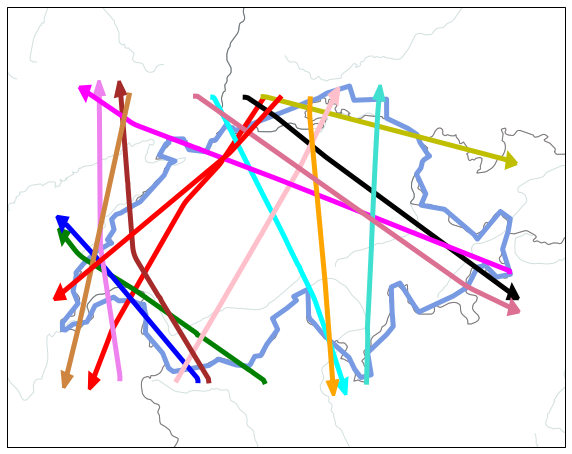

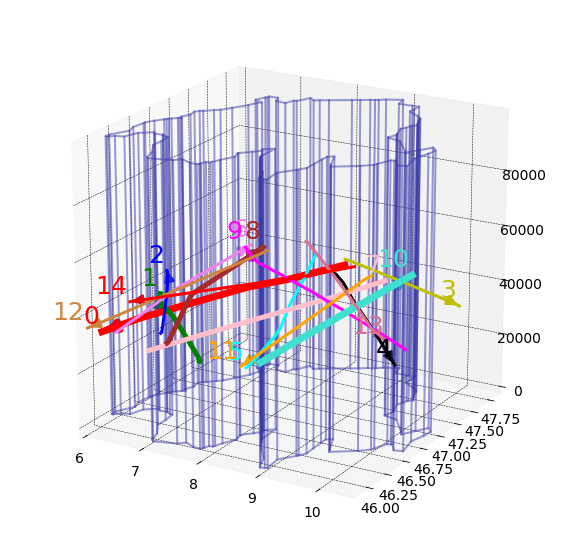

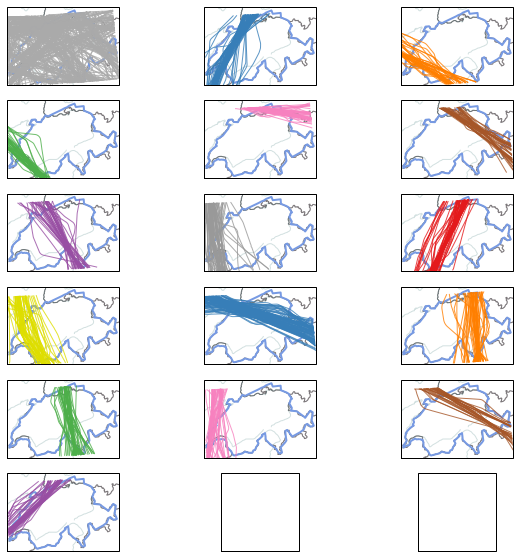

In [3]:
from traffic.data.samples import get_flight
from pathlib import Path

switzerland = get_flight(
    "switzerland", Path("~/traffic/traffic/traffic/data/samples/atm/")
)
import numpy as np

sw = (
    switzerland.assign(
        log_altitude=lambda df: df.altitude.apply(lambda x: np.log10(x) if x > 0 else x)
    )
    .assign_id()
    .eval()
)

from sectflow.clustering import TrajClust
from traffic.core.projection import CH1903

features = ["x", "y", "latitude", "longitude", "altitude", "log_altitude"]

tc = sw.clustering(
    nb_samples=2,
    features=features,
    projection=CH1903(),
    clustering=TrajClust(
        features,
        min_cluster_size_ratio=0.0115,
        # sub_min_cluster_size_ratio=0.01,
        eps=0.5,
        sub_eps=0.5,
    ),
).fit_predict()

from sectflow.plot import clusters_plot2d, plot_trajs
from traffic.core.projection import EuroPP

clusters_plot2d(nm_airspaces["LS"], tc, 50, EuroPP(), plot_trajs=False)

if "altitude" in features:
    clusters_plot3d(nm_airspaces["LS"], tc, 50, EuroPP())  # , scaler=StandardScaler())

plot_trajs(tc, nm_airspaces["LS"])